In [1]:
# Linear regressions of average values of features plotted against total oil produced.
# Porosity and permeability have the highest scores, thickness has some correlation, 
# and the other features have little or no correlation

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats as st
from sklearn.linear_model import LinearRegression

os.chdir("C:\\Users\\ethan\\Downloads\\energy_analytics-master\\Project")

prod = pd.read_csv("well production.csv")

lists = {}

for file in os.listdir("C:\\Users\\ethan\\Downloads\\energy_analytics-master\\Project\\data"):
     filename = os.fsdecode(file)
     if filename.endswith(".csv"):
        df = pd.read_csv(filename)
        lists[filename[:len(filename)-4]]=df
    
    
prod.index = prod['well name']

oil = {}
for name in prod['well name']:
    oil[name] = np.sum(prod.loc[name][4:16])
    
porosityAverages = {}
for name in lists.keys():
    porosityAverages[name] = np.average(lists[name]['porosity'])
pordf = pd.DataFrame(porosityAverages.items(), columns = ['well name','porosity'])

permeabilityAverages = {}
for name in lists.keys():
    permeabilityAverages[name] = np.average(lists[name]['permeability'])
permdf = pd.DataFrame(permeabilityAverages.items(), columns = ['well name','permeability'])
    
poissonAverages = {}
for name in lists.keys():
    poissonAverages[name] = np.average(lists[name]['Poisson\'s ratio'])
    
youngAverages = {}
for name in lists.keys():
    youngAverages[name] = np.average(lists[name]['Young\'s Modulus'])
    
waterAverages = {}
for name in lists.keys():
    waterAverages[name] = np.average(lists[name]['water saturation'])
    
thicknessAverages = {}
for name in lists.keys():
    thicknessAverages[name] = np.average(lists[name]['thickness (ft)'])
    
lengths = {}
for name in lists.keys():
    lengths[name] = lists[name]['easting'].iloc[-1]-lists[name]['easting'].iloc[0]
    
areas = {}
for name in lists.keys():
    areas[name]=lengths[name]*thicknessAverages[name]
    
oildf = pd.DataFrame(oil.items(), columns = ['well name','total oil'])
oildf = oildf.sort_values('well name')


score: 0.3997914995117271
m: 50769.10495285614


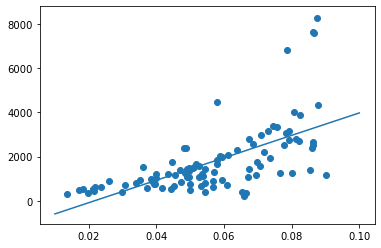

In [2]:
porReg = LinearRegression()
x = np.array(list(porosityAverages.values()))
y = oildf['total oil'].values

porReg.fit(x.reshape(-1,1),y.reshape(-1,1))

print('score: '+str(porReg.score(x.reshape(-1,1),y.reshape(-1,1))))
print('m: '+str(porReg.coef_[0][0]))

plt.plot(np.linspace(0.01,.1,20),porReg.predict(np.linspace(0.01,.1,20).reshape(-1,1)))

plt.scatter(x,y) # porosity vs oil

score: 0.45230105972403123
m: 110744.35675123999


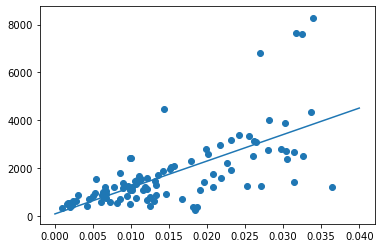

In [3]:
permReg = LinearRegression()
x2 = np.array(list(permeabilityAverages.values()))
y2 = oildf['total oil'].values

permReg.fit(x2.reshape(-1,1),y2.reshape(-1,1))

print('score: '+str(permReg.score(x2.reshape(-1,1),y2.reshape(-1,1))))
print('m: '+str(permReg.coef_[0][0]))

plt.plot(np.linspace(0,.04,20),permReg.predict(np.linspace(0,.04,20).reshape(-1,1)))

plt.scatter(x2,y2) # permeability vs oil

score: 0.007350028773865369
m: -7712.399153637082


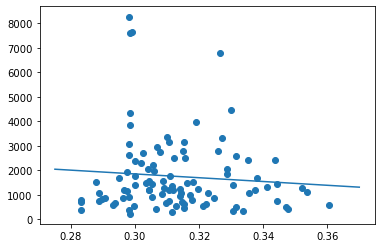

In [4]:
poissonReg = LinearRegression()
x3 = np.array(list(poissonAverages.values()))
y3 = oildf['total oil'].values

poissonReg.fit(x3.reshape(-1,1),y3.reshape(-1,1))

print('score: '+str(poissonReg.score(x3.reshape(-1,1),y3.reshape(-1,1))))
print('m: '+str(poissonReg.coef_[0][0]))

plt.plot(np.linspace(.275,.37,20),poissonReg.predict(np.linspace(0.275,.37,20).reshape(-1,1)))

plt.scatter(x3,y3) # poisson's ratio vs oil

score: 0.007418780729429475
m: -8.334017451649265e-05


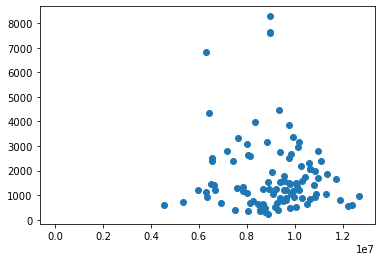

In [5]:
youngReg = LinearRegression()
x4 = np.array(list(youngAverages.values()))
y4 = oildf['total oil'].values

youngReg.fit(x4.reshape(-1,1),y4.reshape(-1,1))

print('score: '+str(youngReg.score(x4.reshape(-1,1),y4.reshape(-1,1))))
print('m: '+str(youngReg.coef_[0][0]))

plt.plot(np.linspace(0.4,1.3,50),youngReg.predict(np.linspace(0.4,1.3,50).reshape(-1,1)))

plt.scatter(x4,y4) # young's modulus vs oil

score: 0.002036107793421671
m: 944.0382282509421


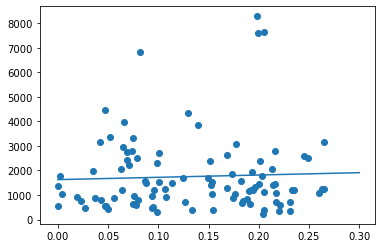

In [6]:
waterReg = LinearRegression()
x5 = np.array(list(waterAverages.values()))
y5 = oildf['total oil'].values

waterReg.fit(x5.reshape(-1,1),y5.reshape(-1,1))

print('score: '+str(waterReg.score(x5.reshape(-1,1),y5.reshape(-1,1))))
print('m: '+str(waterReg.coef_[0][0]))

plt.plot(np.linspace(0,.3,20),waterReg.predict(np.linspace(0,.3,20).reshape(-1,1)))

plt.scatter(x5,y5) # water average vs oil

score: 0.09316745283710914
m: 14.577119977091476


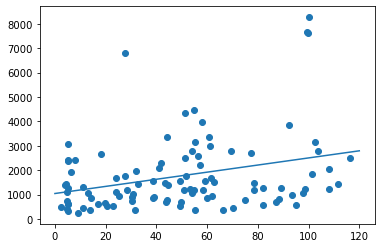

In [7]:
thickReg = LinearRegression()
x6 = np.array(list(thicknessAverages.values()))
y6 = oildf['total oil'].values

thickReg.fit(x6.reshape(-1,1),y6.reshape(-1,1))

print('score: '+str(thickReg.score(x6.reshape(-1,1),y6.reshape(-1,1))))
print('m: '+str(thickReg.coef_[0][0]))

plt.plot(np.linspace(0,120,20),thickReg.predict(np.linspace(0,120,20).reshape(-1,1)))

plt.scatter(x6,y6) # thickness vs oil

score: 0.008536705306852688
m: -0.07078948061661676


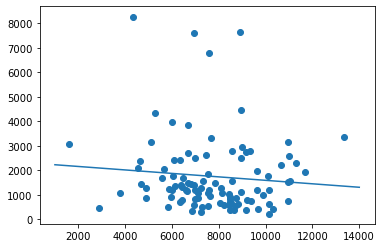

In [8]:
lengthReg = LinearRegression()
x7 = np.array(list(lengths.values()))
y7 = oildf['total oil'].values

lengthReg.fit(x7.reshape(-1,1),y7.reshape(-1,1))

print('score: '+str(lengthReg.score(x7.reshape(-1,1),y7.reshape(-1,1))))
print('m: '+str(lengthReg.coef_[0][0]))

plt.plot(np.linspace(1000,14000,20),lengthReg.predict(np.linspace(1000,14000,20).reshape(-1,1)))

plt.scatter(x7,y7) #  length vs oil

(array([36., 32., 14., 10.,  2.,  2.,  0.,  0.,  1.,  3.]),
 array([ 235. , 1039.4, 1843.8, 2648.2, 3452.6, 4257. , 5061.4, 5865.8,
        6670.2, 7474.6, 8279. ]),
 <a list of 10 Patch objects>)

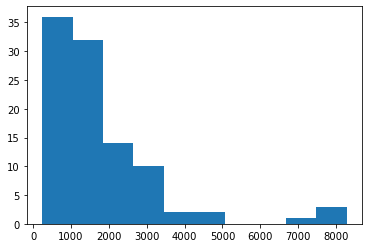

In [9]:
plt.hist(oildf['total oil'].values)

score: 0.07146740203235724
m: 0.0016294151389605262


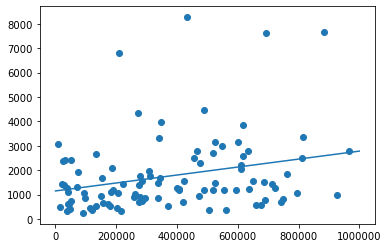

In [10]:
porReg = LinearRegression()
x8 = np.array(list(areas.values()))
y8= oildf['total oil'].values

porReg.fit(x8.reshape(-1,1),y8.reshape(-1,1))

print('score: '+str(porReg.score(x8.reshape(-1,1),y8.reshape(-1,1))))
print('m: '+str(porReg.coef_[0][0]))

plt.plot(np.linspace(0,1000000,50),porReg.predict(np.linspace(0,1000000,50).reshape(-1,1)))

plt.scatter(x8,y8) #area vs oil